In [1]:
import torch

In [2]:
x = [[1,2], [3,4], [5,6],[7,8]]
y = [[3], [7], [11], [15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
X = X.to(device)
Y = Y.to(device)

In [6]:
import torch.nn as nn

In [7]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super(MyNeuralNet, self).__init__()
        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)
        
    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x

In [16]:
mynet = MyNeuralNet().to(device)

In [9]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[ 0.5117, -0.6740],
        [ 0.5958,  0.6556],
        [ 0.3262, -0.5291],
        [-0.3855, -0.1626],
        [ 0.1941,  0.4368],
        [-0.4353, -0.2268],
        [-0.6952,  0.2317],
        [ 0.0377, -0.4407]], device='cuda:0', requires_grad=True)

In [11]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.5117, -0.6740],
        [ 0.5958,  0.6556],
        [ 0.3262, -0.5291],
        [-0.3855, -0.1626],
        [ 0.1941,  0.4368],
        [-0.4353, -0.2268],
        [-0.6952,  0.2317],
        [ 0.0377, -0.4407]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([ 0.0422,  0.2903, -0.5449,  0.6312, -0.4293, -0.5034,  0.1684, -0.0427],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.1446, -0.1225, -0.0534,  0.3246,  0.1634,  0.3334,  0.2789, -0.0162]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0405], device='cuda:0', requires_grad=True)


In [12]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(\
                                          torch.rand(2,8))
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Parameter(\
                                          torch.rand(8,1))

    def forward(self, x):
        x = x @ self.input_to_hidden_layer
        x = self.hidden_layer_activation(x)
        x = x @ self.hidden_to_output_layer
        return x

In [13]:
loss_func = nn.MSELoss()

In [14]:
from torch.optim import SGD

In [20]:
opt = SGD(mynet.parameters(), lr = 0.001)

In [21]:
loss_history = []
for _ in range(50):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'loss value')

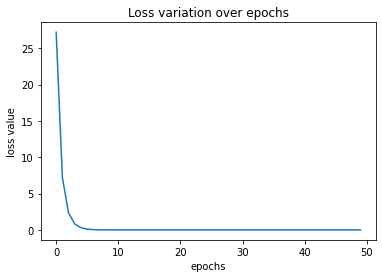

In [22]:
plt.plot(loss_history)
plt.title('Loss variation over epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')